<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/computer_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision
Computer vision can be achieved by writing algorithms that find patterns in visual data.

# Get some data
The data is from Food101 dataset, but it was modified to use two classes.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-13 17:21:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 142.251.172.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  96.7MB/s    in 1.1s    

2023-05-13 17:21:02 (96.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [3]:
# Count images in directory
print(len(os.listdir("pizza_steak/train/steak")))

750


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 288, 3)


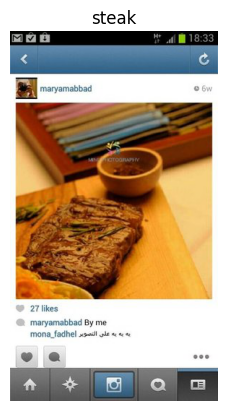

In [5]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class='steak')

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches of augmented data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 259ms/step - loss: 0.6956 - accuracy: 0.5347 - val_loss: 0.6645 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5331 - accuracy: 0.7340 - val_loss: 0.3808 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 245ms/step - loss: 0.4281 - accuracy: 0.8087 - val_loss: 0.3540 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3635 - accuracy: 0.8487 - val_loss: 0.3405 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3044 - accuracy: 0.8760 - val_loss: 0.3376 - val_accuracy: 0.8420


# Attempting to use a non-convolutional neural network to fit the data
It sucks

In [10]:
tf.random.set_seed(42)

non_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

non_cnn_model.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

non_cnn_model.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 3.6438 - accuracy: 0.6000 - val_loss: 3.4570 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 1.4059 - accuracy: 0.6960 - val_loss: 0.5234 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.5850 - accuracy: 0.7500 - val_loss: 0.5588 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6235 - accuracy: 0.7353 - val_loss: 0.9295 - val_accuracy: 0.6120
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.5360 - accuracy: 0.7833 - val_loss: 0.6135 - val_accuracy: 0.6980


In [11]:
non_cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary Classification
1. Visualize the data
2. Preprocess the data (prepare for the model, scale, normalize)
3. Create model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters to improve the model

## 1. Visualize the data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


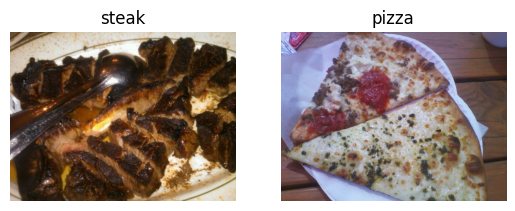

In [24]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)

steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")